In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from google.colab import files
uploaded = files.upload()


import io
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.StringIO(uploaded[filename].decode('utf-8')), sep=";")


if 'id' in df.columns:
    df = df.drop(columns='id')


X = df.drop('cardio', axis=1)
y = df['cardio']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_lr = logreg.predict(X_test_scaled)

print("🔹 Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:, 1]))


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n🔸 Random Forest Results:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))


Saving cardio_train.csv to cardio_train (1).csv
🔹 Logistic Regression Results:
[[5362 1626]
 [2244 4768]]
              precision    recall  f1-score   support

           0       0.70      0.77      0.73      6988
           1       0.75      0.68      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.73      0.72      0.72     14000
weighted avg       0.73      0.72      0.72     14000

ROC AUC: 0.7858994626433188

🔸 Random Forest Results:
[[5057 1931]
 [2087 4925]]
              precision    recall  f1-score   support

           0       0.71      0.72      0.72      6988
           1       0.72      0.70      0.71      7012

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000

ROC AUC: 0.7739008151370894


In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("📈 XGBoost Results:")
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1]))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:17:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📈 XGBoost Results:
              precision    recall  f1-score   support

           0       0.72      0.77      0.74      6988
           1       0.75      0.70      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000

ROC AUC: 0.7977208443224812


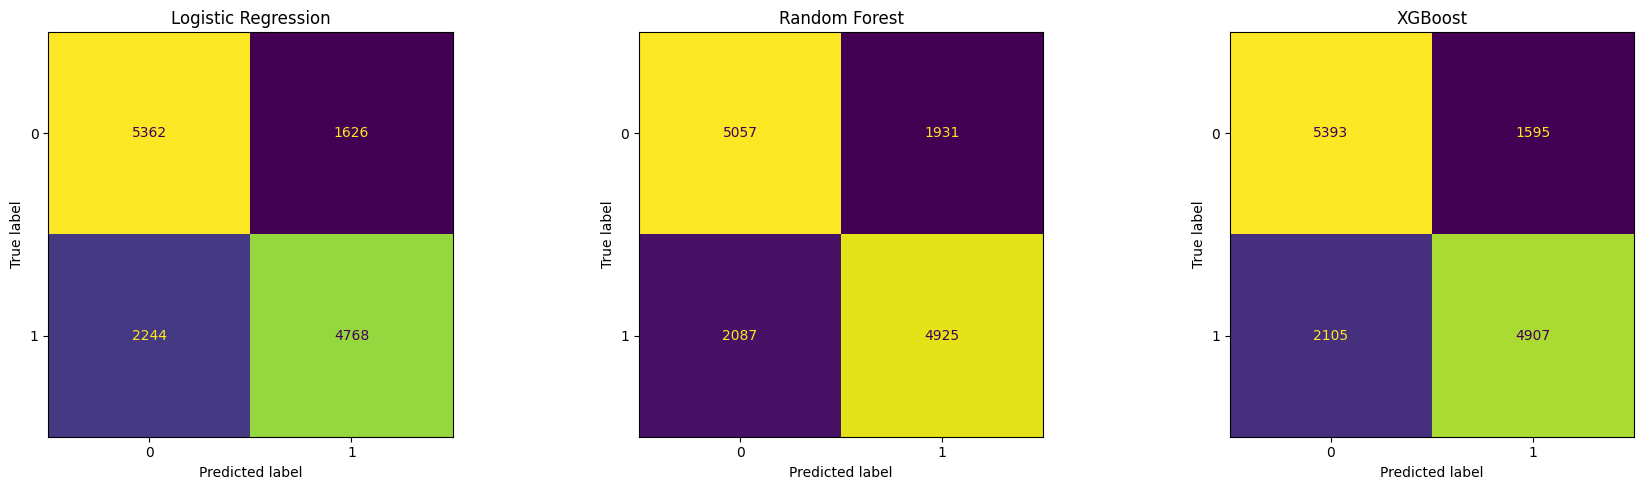

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Assume these are already predicted:
# y_pred_lr, y_pred_rf, y_pred_xgb
# And true labels: y_test

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Logistic Regression
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, ax=axes[0], colorbar=False)
axes[0].set_title("Logistic Regression")

# Random Forest
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, ax=axes[1], colorbar=False)
axes[1].set_title("Random Forest")

# XGBoost
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, ax=axes[2], colorbar=False)
axes[2].set_title("XGBoost")

plt.tight_layout()
plt.show()
